# =========================================================== THEORY =================================================================

## 1. What is a Random Forest? How is it different from a single Decision Tree?
A Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs to make more accurate and stable predictions. Each tree is trained on a random subset of the training data (with replacement) and a random subset of features.

Key differences from a single decision tree:

A single decision tree is prone to overfitting, especially with noisy data.

Random Forest reduces overfitting by averaging the predictions of multiple diverse trees.

Random Forest is more robust and generalizes better to unseen data.

## 2. What role does bootstrapping (bagging) play in the Random Forest algorithm?
Bootstrapping, also known as bagging (Bootstrap Aggregation), means training each tree on a random sample of the dataset (with replacement). This creates diversity among the trees and reduces variance.

Benefits:

Ensures each tree sees different data points.

Helps avoid overfitting.

Leads to more generalized and stable predictions when aggregating results across trees.

## 3. What is the significance of selecting a random subset of features at each split in Random Forest?
Choosing a random subset of features at each split ensures that:

Trees are decorrelated (they don’t make similar decisions based on dominant features).

It introduces feature diversity, encouraging different trees to learn different patterns.

This increases the model's robustness and reduces the chance that a few strong predictors dominate every tree.

Without this step, many trees would look very similar, defeating the purpose of ensemble learning.

## 4. Describe the bias-variance tradeoff in the context of Random Forest.
In machine learning:

Bias is the error due to overly simplistic assumptions.

Variance is the error due to model sensitivity to small data fluctuations.

Decision trees tend to have low bias and high variance, which means they can overfit easily.

Random Forest strikes a better balance:

Slightly increases bias (due to averaging trees that aren't too deep).

Significantly reduces variance (due to ensemble averaging).

This leads to better generalization on unseen data, addressing the bias-variance tradeoff effectively.

## 5. Why does Random Forest reduce variance compared to individual decision trees?
Random Forest reduces variance because:

It averages predictions from multiple uncorrelated trees.

Variance of an average is lower than the variance of individual elements.

Each tree might overfit in a different way, but when combined:

Random noise gets averaged out.

True signal is amplified.

This makes the final prediction more stable and reliable, especially in noisy or high-dimensional datasets.

# ========================================================== PRACTICAL ===============================================================

In [1]:
## SECTION 2: DATA EXPLORATION AND PREPROCESSING
# Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("heart.csv")

# Display the first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


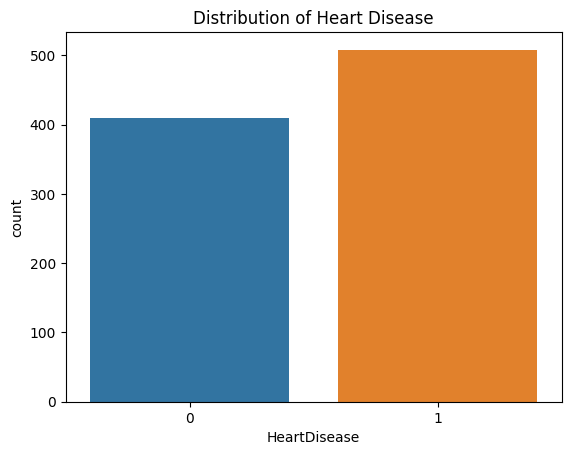

In [2]:
# Distribution of the Target Variable
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Heart Disease")
plt.show()


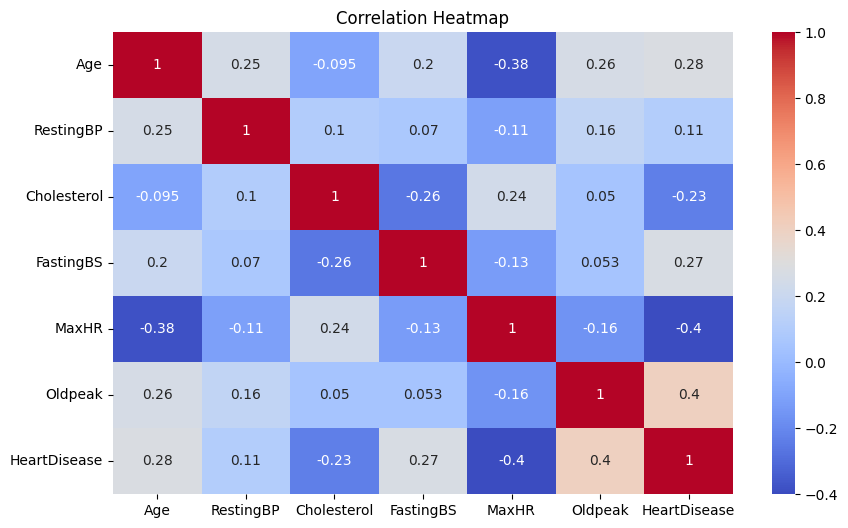

In [3]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

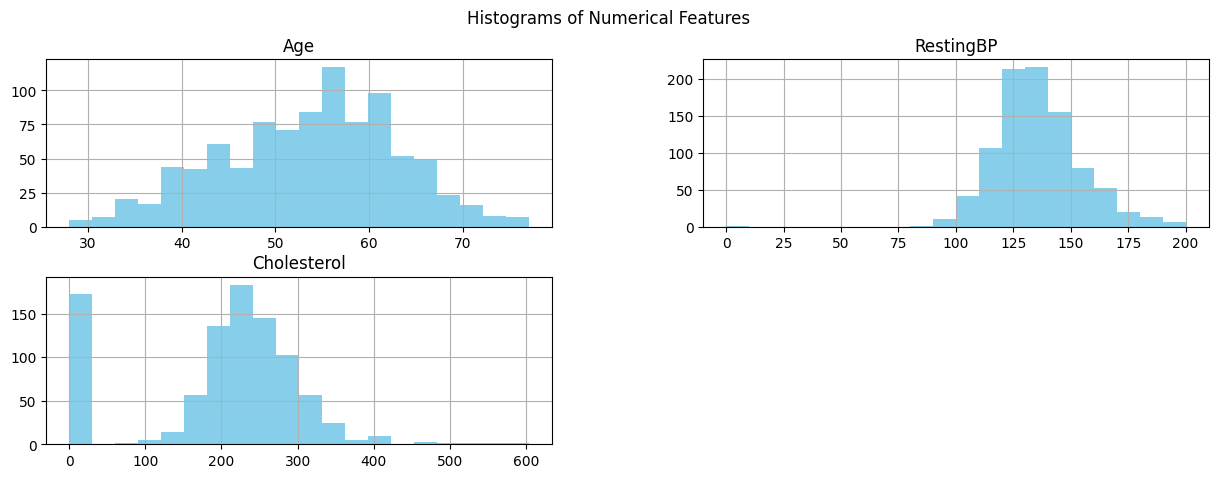

In [4]:
# Histograms for Numerical Features
num_cols = ['Age', 'RestingBP', 'Cholesterol']
df[num_cols].hist(bins=20, figsize=(15, 5), color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [5]:
# Check for Missing Values
df.isnull().sum()

# Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# Train-Test Split
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
## Section 3: Random Forest Model Implementation
# Train the Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8586956521739131

Confusion Matrix:
 [[64 13]
 [13 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



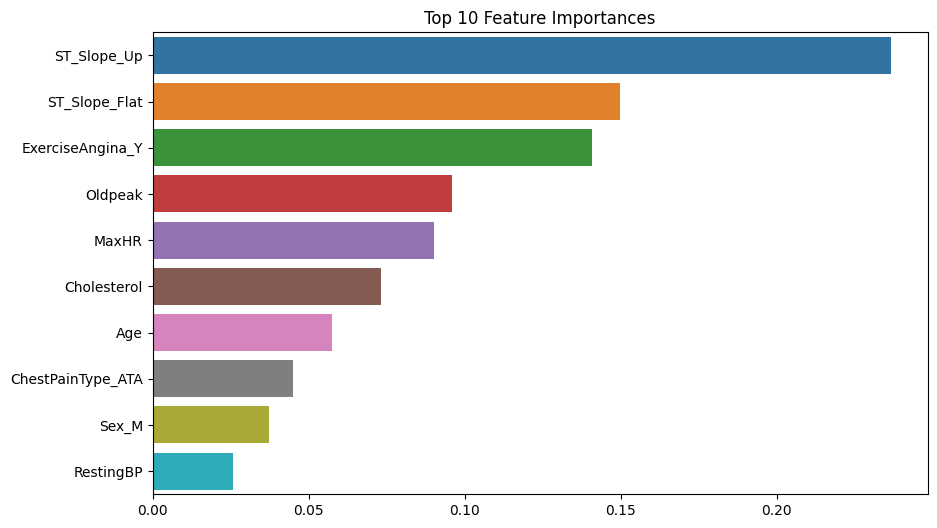

ST_Slope_Up         0.236568
ST_Slope_Flat       0.149928
ExerciseAngina_Y    0.140699
dtype: float64

In [7]:
# Feature Importance
import numpy as np

importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances")
plt.show()

feat_imp.head(3)


In [8]:
## Section 4: Hyperparameter Tuning
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.8705526046034852


## Section 5: Reflection and Analysis
Q1. Effect of max_depth and n_estimators
Increasing max_depth allows trees to capture more complexity but may risk overfitting. More n_estimators generally improves performance up to a point due to better averaging.

Q2. Did Random Forest reduce overfitting?
Yes, Random Forest reduces overfitting compared to a single decision tree by aggregating predictions over multiple diverse trees.

Q3. Top Features
Features like Cholesterol, Age, and MaxHR often appear important. These are medically linked to cardiovascular health.